<a href="https://colab.research.google.com/github/Piyush01Bhatt/DataScience-Competitions/blob/master/LTFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#unzip train_ltfs.zip

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np
from dateutil.relativedelta import relativedelta

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_ltfs.csv')
data_dict = pd.read_excel('Data Dictionary.xlsx')

In [0]:
print(f'train shape = {train.shape}')
print(f'test shape = {test.shape}')

train shape = (233154, 41)
test shape = (112392, 40)


In [0]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [0]:
train['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

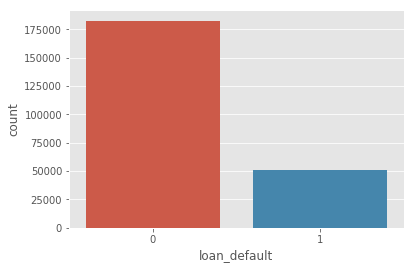

In [0]:
sns.countplot(x='loan_default',data=train)

In [0]:
label0 = train['loan_default'].value_counts()[0]
label1 = train['loan_default'].value_counts()[1]
print(f'loan_default val 0 = {label0/train.shape[0]}')
print(f'loan_default val 1 = {label1/train.shape[0]}')

loan_default val 0 = 0.7829288796246258
loan_default val 1 = 0.2170711203753742


There is clearly an imbalance in the predictive class labels of loan_default.
So we will be using the techniques of undersampling or over sampling for predicting the loan_default values

In [0]:
train.dtypes.value_counts()

int64      34
object      6
float64     1
dtype: int64

##** Disbursed Amount**
Amount of Loan disbursed i.e the amount received after the loan is approved.

(0, 150000)

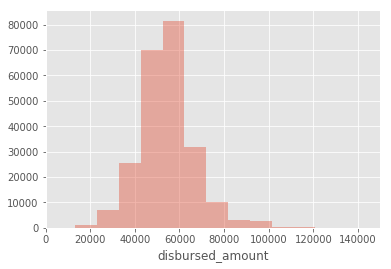

In [0]:
sns.distplot(train['disbursed_amount'],kde=False,bins=100)
plt.xlim(0, 150000)

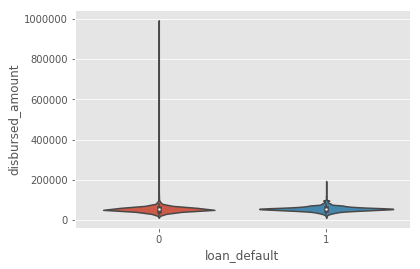

In [0]:
sns.violinplot(y='disbursed_amount',x='loan_default',data=train)

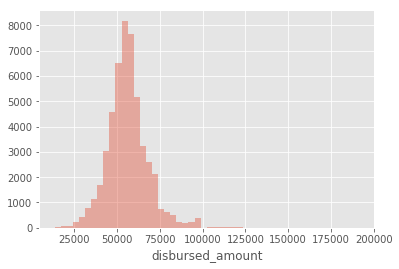

In [0]:
sns.distplot(train.loc[train['loan_default']==1,'disbursed_amount'],kde=False,bins=50)

(0, 200000)

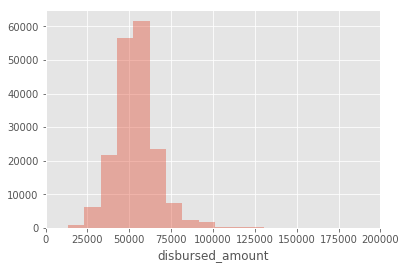

In [0]:
sns.distplot(train.loc[train['loan_default']==0,'disbursed_amount'],kde=False,bins=100)
plt.xlim(0, 200000)

data distribution of the disbursed amount for 'loan_default' 0 or 1  is almost same if limit is 2 lakhs as there are more samples of 'loan_default' label zero it has outliers above 2 lakhs amount.

In [0]:
train.loc[train['disbursed_amount']>200000,'loan_default'].value_counts()

0    7
Name: loan_default, dtype: int64

In [0]:
test.loc[train['disbursed_amount']>200000].shape[0]

1

(0, 200000)

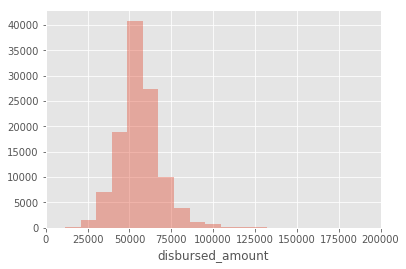

In [0]:
sns.distplot(test['disbursed_amount'],kde=False,bins=100)
plt.xlim(0, 200000)

##**Asset Cost**
(Real cost of the asset i.e the vehicle purchased)

(0, 200000)

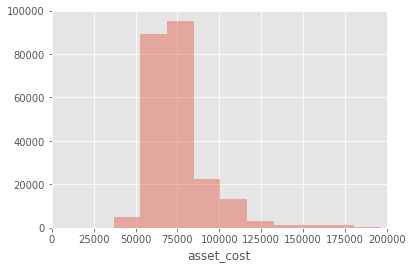

In [0]:
sns.distplot(train['asset_cost'],kde=False,bins=100)
plt.xlim(0, 200000)

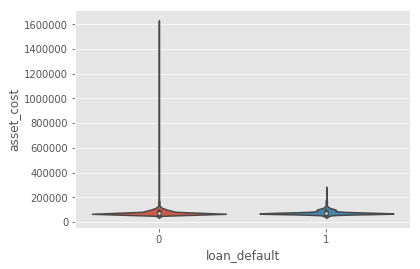

In [0]:
sns.violinplot(y='asset_cost',x='loan_default',data=train)

**ltv**(Loan to value of the asset)
I guess it is the ratio between the loan asked and the value of the asset, telling the percentage of the amount user tends to pay via emi

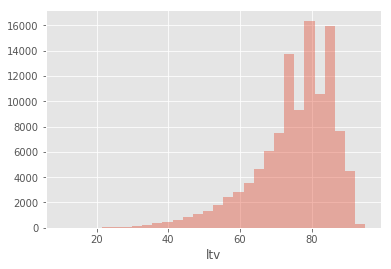

In [0]:
sns.distplot(test['ltv'],kde=False,bins=30)

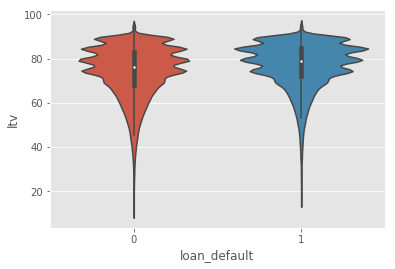

In [0]:
sns.violinplot(y='ltv',x='loan_default',data=train)

Both the labels have almost similar distribution and variation of data. There are defaulters mostly in the large loan  amounts. Most of the people in the data are the one's with high ltv ratio which shows many people considered buying vehicles on loans with almost 70% money to be paid in emi to the value of the vehicle.



###**Date of birth and disbursal date**
We can use both of these to find the person's age at the time he/she got the loan


In [0]:
train[['Date.of.Birth','DisbursalDate']].head()

,Date.of.Birth,DisbursalDate
0,01-01-84,03-08-18
1,31-07-85,26-09-18
2,24-08-85,01-08-18
3,30-12-93,26-10-18
4,09-12-77,26-09-18


In [0]:
train['Date.of.Birth'] = pd.to_datetime(train['Date.of.Birth'])
train['DisbursalDate'] = pd.to_datetime(train['DisbursalDate'])

In [0]:
test['Date.of.Birth'] = pd.to_datetime(test['Date.of.Birth'])
test['DisbursalDate'] = pd.to_datetime(test['DisbursalDate'])

In [0]:
def countAge(row):
  return relativedelta(row['DisbursalDate'],row['Date.of.Birth']).years

In [0]:
train['AgeAtDisbursal'] = train.apply(countAge,axis=1)

In [0]:
test['AgeAtDisbursal'] = test.apply(countAge,axis=1)

In [0]:
train[['Date.of.Birth','DisbursalDate','AgeAtDisbursal']].head(10)

,Date.of.Birth,DisbursalDate,AgeAtDisbursal
0,1984-01-01,2018-03-08,34
1,1985-07-31,2018-09-26,33
2,1985-08-24,2018-01-08,32
3,1993-12-30,2018-10-26,24
4,1977-09-12,2018-09-26,41
5,1990-08-09,2018-09-19,28
6,1988-01-06,2018-09-23,30
7,1989-04-10,2018-09-16,29
8,1991-11-15,2018-05-09,26
9,2068-01-06,2018-09-16,-49


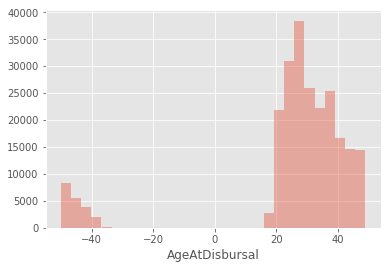

In [0]:
sns.distplot(train['AgeAtDisbursal'],kde=False,bins=30)

In [0]:
len(train[train['AgeAtDisbursal']<0])

19866

In [0]:
train.loc[train['AgeAtDisbursal']<0,'Date.of.Birth'].head()

9    2068-01-06
26   2068-02-08
32   2066-01-06
59   2064-01-06
68   2067-01-01
Name: Date.of.Birth, dtype: datetime64[ns]

In [0]:
max(train['AgeAtDisbursal'])

49

The above ages which are negative show mistyped or wrong filled dobs. The ages are mostly between 20 - 50 years that is mostly adults.


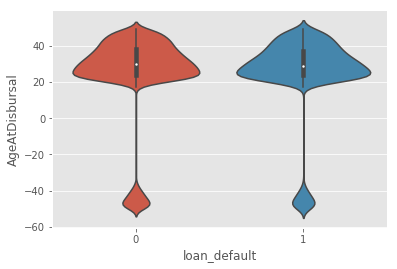

In [0]:
sns.violinplot(y='AgeAtDisbursal',x='loan_default',data=train)

##**Id flags**
Lets make a new columns to check if any of the ids are submitted

In [0]:
def checkId(row):
  if row['MobileNo_Avl_Flag']==1 or row['Aadhar_flag']==1 or row['PAN_flag']==1 or row['VoterID_flag']==1 or row['Driving_flag']==1 or row['Passport_flag']==1:
    return 1
  else:
    return 0

In [0]:
train['idCheck'] = train.apply(checkId,axis=1)

In [0]:
train['idCheck'].value_counts()

1    233154
Name: idCheck, dtype: int64

Since all are labeled as 1 this means whole data if verified by valid ids

##**PERFORM_CNS.SCORE and PERFORM_CNS.SCORE.DESCRIPTION**

In [0]:
train[['PERFORM_CNS.SCORE','PERFORM_CNS.SCORE.DESCRIPTION']].head(10)

,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION
0,0,No Bureau History Available
1,598,I-Medium Risk
2,0,No Bureau History Available
3,305,L-Very High Risk
4,0,No Bureau History Available
5,825,A-Very Low Risk
6,0,No Bureau History Available
7,17,Not Scored: Not Enough Info available on the c...
8,718,D-Very Low Risk
9,818,A-Very Low Risk


The cns score is like a credit score showing ability to pay back the borrowed amount

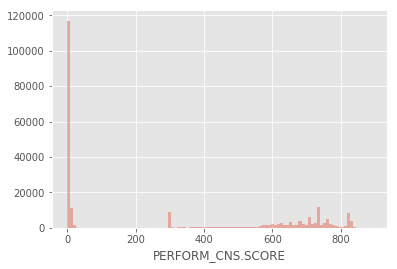

In [0]:
sns.distplot(train['PERFORM_CNS.SCORE'],kde=False,bins=100)

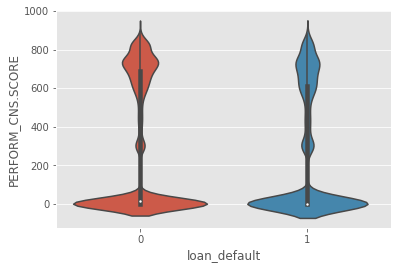

In [0]:
sns.violinplot(y='PERFORM_CNS.SCORE',x='loan_default',data=train)

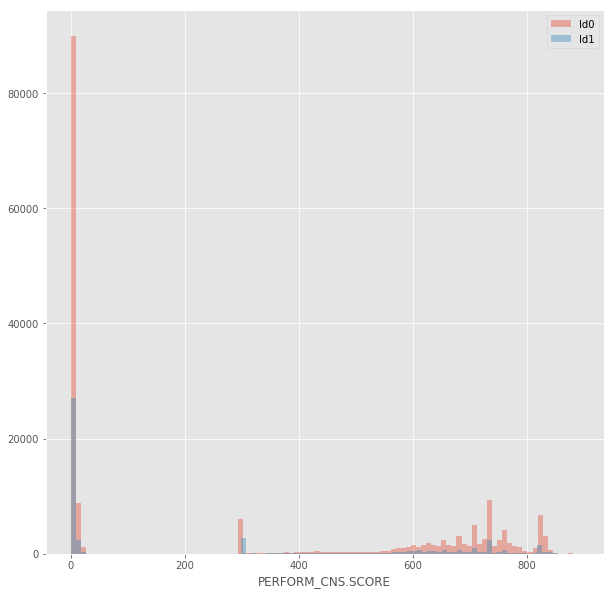

In [0]:
plt.figure(figsize=(10,10))
sns.distplot(train.loc[train['loan_default']==0,'PERFORM_CNS.SCORE'],kde=False,bins=100,label='ld0')
sns.distplot(train.loc[train['loan_default']==1,'PERFORM_CNS.SCORE'],kde=False,bins=100,label='ld1')
plt.legend()

It is clear by graph that most of the defaulters are with cns score of 0 that is bureau had no history of these people and some too with high risk i.e cns score below 400

In [0]:
train.loc[train['PERFORM_CNS.SCORE']<=50,'loan_default'].value_counts()

0    99970
1    29815
Name: loan_default, dtype: int64

In [0]:
train.loc[train['PERFORM_CNS.SCORE']<=400,'loan_default'].value_counts()

0    108127
1     33384
Name: loan_default, dtype: int64

In [0]:
train.loc[train['PERFORM_CNS.SCORE']>400,'loan_default'].value_counts()

0    74416
1    17227
Name: loan_default, dtype: int64

In [0]:
total_1 = 33384+17227
total_1

50611

In [0]:
defaulters_with_high_risk = (33384/total_1)*100
defaulters_with_med_or_low_risk = (17227/total_1)*100
print(f'High risk cns score defaulters = {defaulters_with_high_risk}')
print(f'Medium or low risk cns score defaulters = {defaulters_with_med_or_low_risk}')

High risk cns score defaulters = 65.96194503171247
Medium or low risk cns score defaulters = 34.038054968287526


In [0]:
print(f'No history defaulters = {(29815/total_1)*100}')

No history defaulters = 58.910118353717564


In [0]:
train['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

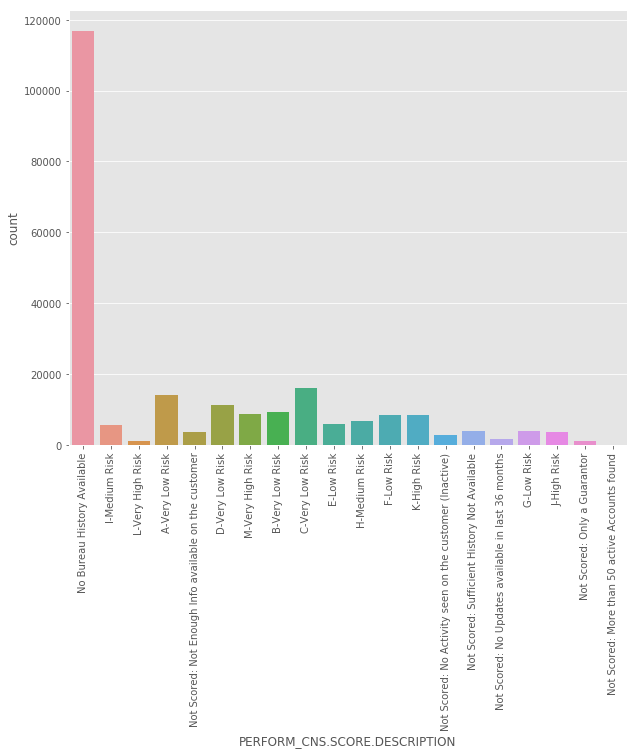

In [0]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="PERFORM_CNS.SCORE.DESCRIPTION", data=train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

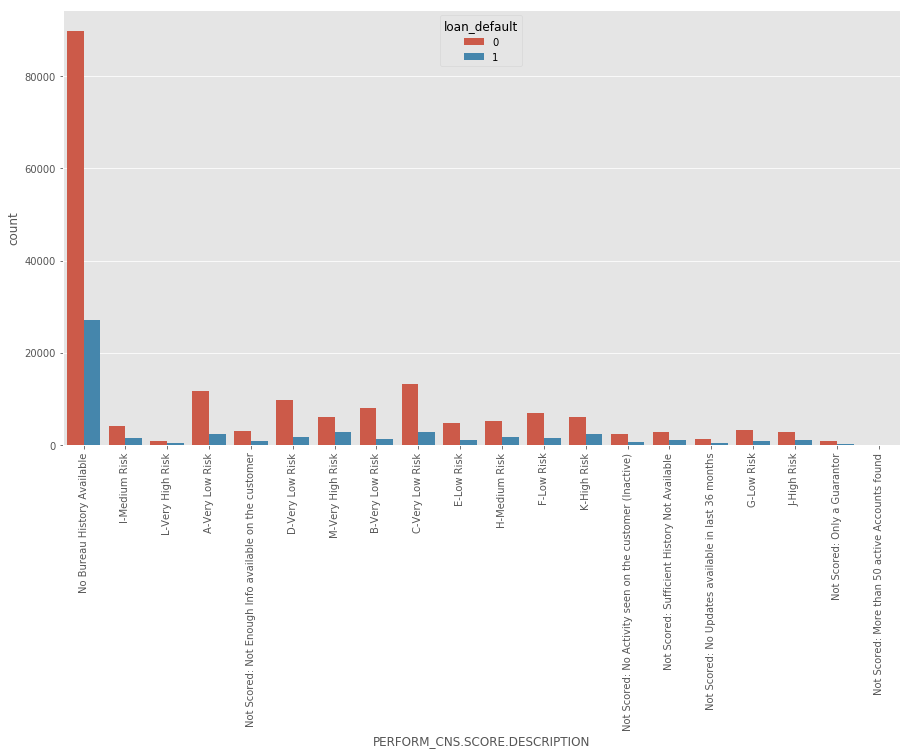

In [0]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="PERFORM_CNS.SCORE.DESCRIPTION", hue='loan_default',data=train)
plt.xticks(rotation=90)

##**PRI.NO.OF.ACCTS**
Count of total loans taken by the customer at the time of disbursement

In [0]:
train['PRI.NO.OF.ACCTS'].head()

0    0
1    1
2    0
3    3
4    0
Name: PRI.NO.OF.ACCTS, dtype: int64

(0, 50)

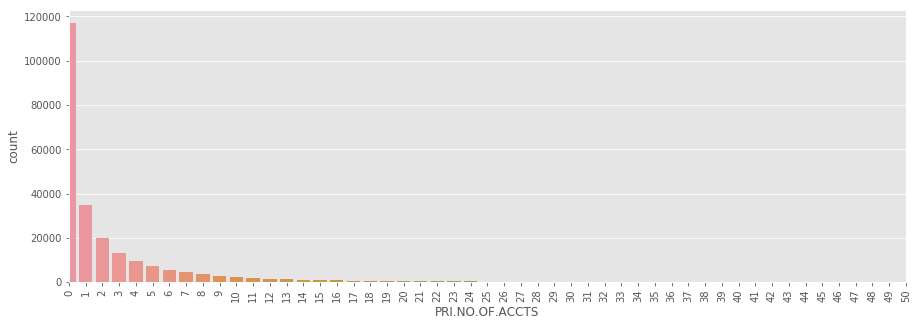

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(x='PRI.NO.OF.ACCTS',data=train)
plt.xticks(rotation=90)
plt.xlim(0,50)

In [0]:
train['PRI.NO.OF.ACCTS'].value_counts()

0      116950
1       34978
2       19784
3       13015
4        9323
5        7222
6        5557
7        4411
8        3570
9        2884
10       2358
11       1919
12       1567
13       1401
14       1132
15        941
16        798
17        652
18        573
19        503
20        436
21        347
22        323
24        286
23        250
25        187
26        170
27        153
28        141
29        130
        ...  
87          3
108         2
94          2
90          2
84          2
82          2
81          2
148         2
73          2
70          2
354         1
131         1
104         1
132         1
102         1
100         1
113         1
114         1
99          1
86          1
136         1
88          1
453         1
271         1
85          1
83          1
147         1
120         1
194         1
124         1
Name: PRI.NO.OF.ACCTS, Length: 108, dtype: int64

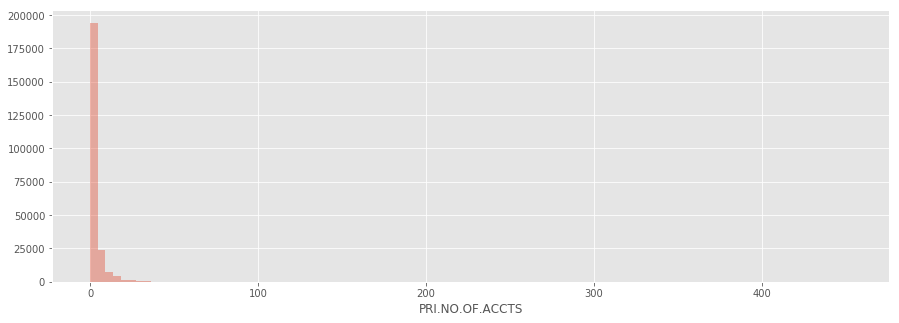

In [0]:
plt.figure(figsize=(15,5))
sns.distplot(train['PRI.NO.OF.ACCTS'],kde=False,bins=100)

(0, 50)

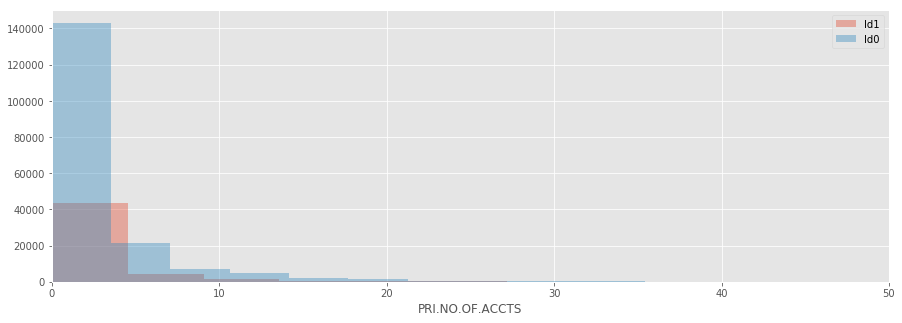

In [0]:
plt.figure(figsize=(15,5))
sns.distplot(train.loc[train['loan_default']==1,'PRI.NO.OF.ACCTS'],kde=False,bins=100,label='ld1')
sns.distplot(train.loc[train['loan_default']==0,'PRI.NO.OF.ACCTS'],kde=False,bins=100,label='ld0')
plt.legend()
plt.xlim(0,50)

In [0]:
train['PRI.NO.OF.ACCTS'].mean()

2.4406358029456925

Checking out the mean does show that on an average people took almost 3 loans at time of disbursement but the data also have some number of loans above 100. Is this misleading or a true case? Although the data maker has kept distributions of label 0 and 1 loan defaulters same, the distibution plot shows decreasing rate of defaulters as the number of initial loan taken increases.

##**PRI.ACTIVE.ACCTS**
Count of active loans taken by the customer at the time of disbursement

In [0]:
train['PRI.ACTIVE.ACCTS'].head()

0    0
1    1
2    0
3    0
4    0
Name: PRI.ACTIVE.ACCTS, dtype: int64

In [0]:
train['PRI.ACTIVE.ACCTS'].value_counts()

0      137016
1       42055
2       21549
3       12268
4        7460
5        4542
6        2788
7        1795
8        1202
9         756
10        515
11        330
12        229
13        177
14        120
15         96
17         54
16         53
18         33
19         27
20         13
22         10
23         10
24         10
21          9
25          7
26          6
28          5
27          3
31          2
32          2
34          2
35          2
37          2
52          1
144         1
39          1
42          1
43          1
65          1
Name: PRI.ACTIVE.ACCTS, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

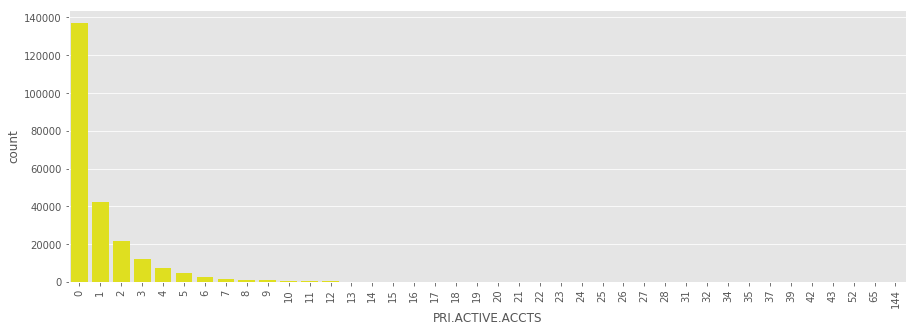

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(x='PRI.ACTIVE.ACCTS',data=train,color='yellow')
plt.xticks(rotation=90)

In [0]:
train['diff_total_to_active'] = train['PRI.NO.OF.ACCTS'] - train['PRI.ACTIVE.ACCTS']

In [0]:
test['diff_total_to_active'] = test['PRI.NO.OF.ACCTS'] - test['PRI.ACTIVE.ACCTS']

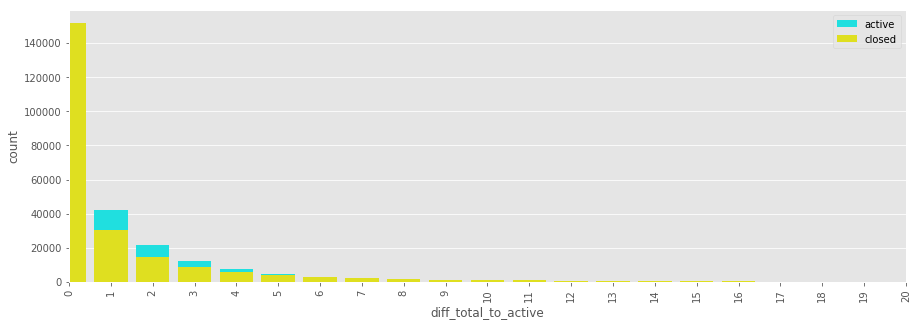

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(x='PRI.ACTIVE.ACCTS',data=train,label='active',color='cyan')
sns.countplot(x='diff_total_to_active',data=train,label='closed',color='yellow')
plt.xticks(rotation=90)
plt.xlim(0,20)
plt.legend()

##**PRI.OVERDUE.ACCTS**
Count of default accounts at the time of disbursement

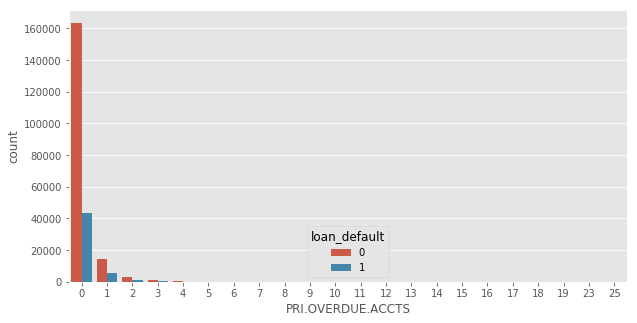

In [0]:
plt.figure(figsize=(10,5))
sns.countplot(train['PRI.OVERDUE.ACCTS'],hue='loan_default',data=train)

##**Employment Type**

In [0]:
train['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

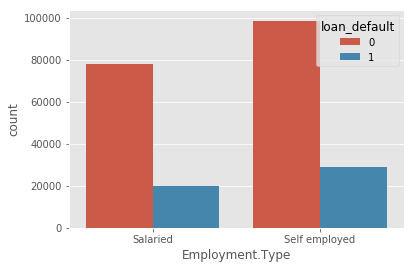

In [0]:
sns.countplot(x='Employment.Type',hue='loan_default',data=train)

##**'AVERAGE.ACCT.AGE' and 'CREDIT.HISTORY.LENGTH'**

In [0]:
train[['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']].head()

,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,0yrs 0mon,0yrs 0mon
1,1yrs 11mon,1yrs 11mon
2,0yrs 0mon,0yrs 0mon
3,0yrs 8mon,1yrs 3mon
4,0yrs 0mon,0yrs 0mon


In [0]:
train['AVERAGE.ACCT.AGE.YEAR'] = train['AVERAGE.ACCT.AGE'].apply(lambda x: int(x.split(' ')[0][0]))
train['AVERAGE.ACCT.AGE.MONTH'] = train['AVERAGE.ACCT.AGE'].apply(lambda x: int(x.split(' ')[1][0]))

In [0]:
train[['AVERAGE.ACCT.AGE.YEAR','AVERAGE.ACCT.AGE.MONTH']].head()

,AVERAGE.ACCT.AGE.YEAR,AVERAGE.ACCT.AGE.MONTH
0,0,0
1,1,1
2,0,0
3,0,8
4,0,0


In [0]:
train['CREDIT.HISTORY.LENGTH.YEAR'] = train['CREDIT.HISTORY.LENGTH'].apply(lambda x: int(x.split(' ')[0][0]))
train['CREDIT.HISTORY.LENGTH.MONTH'] = train['CREDIT.HISTORY.LENGTH'].apply(lambda x: int(x.split(' ')[1][0]))

In [0]:
train[['CREDIT.HISTORY.LENGTH.YEAR','CREDIT.HISTORY.LENGTH.MONTH']].head()

,CREDIT.HISTORY.LENGTH.YEAR,CREDIT.HISTORY.LENGTH.MONTH
0,0,0
1,1,1
2,0,0
3,1,3
4,0,0


In [0]:
test['AVERAGE.ACCT.AGE.YEAR'] = test['AVERAGE.ACCT.AGE'].apply(lambda x: int(x.split(' ')[0][0]))
test['AVERAGE.ACCT.AGE.MONTH'] = test['AVERAGE.ACCT.AGE'].apply(lambda x: int(x.split(' ')[1][0]))

In [0]:
test['CREDIT.HISTORY.LENGTH.YEAR'] = test['CREDIT.HISTORY.LENGTH'].apply(lambda x: int(x.split(' ')[0][0]))
test['CREDIT.HISTORY.LENGTH.MONTH'] = test['CREDIT.HISTORY.LENGTH'].apply(lambda x: int(x.split(' ')[1][0]))

##**Data Cleaning and prediction model**

In [0]:
train.isnull().any()

UniqueID                               False
disbursed_amount                       False
asset_cost                             False
ltv                                    False
branch_id                              False
supplier_id                            False
manufacturer_id                        False
Current_pincode_ID                     False
Date.of.Birth                          False
Employment.Type                         True
DisbursalDate                          False
State_ID                               False
Employee_code_ID                       False
MobileNo_Avl_Flag                      False
Aadhar_flag                            False
PAN_flag                               False
VoterID_flag                           False
Driving_flag                           False
Passport_flag                          False
PERFORM_CNS.SCORE                      False
PERFORM_CNS.SCORE.DESCRIPTION          False
PRI.NO.OF.ACCTS                        False
PRI.ACTIVE

In [0]:
train['Employment.Type'] = train['Employment.Type'].astype("category").cat.codes
train['Employment.Type'].value_counts()

2    127635
1     97858
0      7661
Name: Employment.Type, dtype: int64

In [0]:
train_encoded = pd.get_dummies(train, columns=['PERFORM_CNS.SCORE.DESCRIPTION'])
train_encoded.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,1,...,0,0,0,1,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,2,...,0,0,0,0,0,0,0,0,0,0
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,2,...,0,0,0,1,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,2,...,0,1,0,0,0,0,0,0,0,0
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,2,...,0,0,0,1,0,0,0,0,0,0


In [0]:
test['Employment.Type'] = test['Employment.Type'].astype("category").cat.codes
test['Employment.Type'].value_counts()

2    59794
1    49155
0     3443
Name: Employment.Type, dtype: int64

In [0]:
test_encoded = pd.get_dummies(test, columns=['PERFORM_CNS.SCORE.DESCRIPTION'])
test_encoded.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PERFORM_CNS.SCORE.DESCRIPTION_J-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available
0,655269,53478,63558,86.54,67,22807,45,1497,1974-01-01,1,...,0,0,0,0,1,0,0,0,0,0
1,723482,55513,63163,89.45,67,22807,45,1497,1985-05-20,2,...,0,0,0,0,0,0,0,0,0,0
2,758529,65282,84320,79.93,78,23135,86,2071,1995-10-14,1,...,0,0,0,0,1,0,0,0,0,0
3,763449,46905,63896,76.58,78,17014,45,2070,1973-01-06,2,...,0,0,0,0,0,0,0,0,1,0
4,708663,51428,63896,86.08,78,17014,45,2069,1972-01-06,1,...,0,0,0,0,1,0,0,0,0,0


In [0]:
drop_cols = ['UniqueID','branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
             'DisbursalDate','State_ID', 'Employee_code_ID','MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 
             'VoterID_flag','Driving_flag', 'Passport_flag','loan_default','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH',
             'idCheck','PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found']

In [0]:
features = train_encoded.columns.drop(drop_cols)

In [0]:
features

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Employment.Type',
       'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'AgeAtDisbursal', 'diff_total_to_active',
       'AVERAGE.ACCT.AGE.YEAR', 'AVERAGE.ACCT.AGE.MONTH',
       'CREDIT.HISTORY.LENGTH.YEAR', 'CREDIT.HISTORY.LENGTH.MONTH',
       'PERFORM_CNS.SCORE.DESCRIPTION_A-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_B-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_C-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_D-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_E-Low Risk',
       'PERFORM_CNS.SCORE.

In [0]:
count_class_0, count_class_1 = train_encoded['loan_default'].value_counts()

#division of dataframe by classes
df_class_0 = train_encoded[train_encoded['loan_default']==0]
df_class_1 = train_encoded[train_encoded['loan_default']==1]

In [0]:
df_class_0.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available
count,182543.000000,182543.000000,1.825430e+05,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000,...,182543.000000,182543.00000,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000,182543.00000
mean,534700.011186,53826.471111,7.572281e+04,74.154093,71.825833,19588.334360,69.319974,3363.389015,1.507064,7.148781,...,0.032732,0.00447,0.033433,0.492476,0.000016,0.012901,0.006804,0.015898,0.004207,0.01535
std,67551.156434,13140.699007,1.901500e+04,11.681455,69.193732,3501.284188,22.098119,2234.614601,0.562028,4.454475,...,0.177935,0.06671,0.179765,0.499945,0.004054,0.112848,0.082205,0.125080,0.064727,0.12294
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,0.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,476510.000000,46369.000000,6.568000e+04,68.020000,13.000000,16445.000000,48.000000,1509.000000,1.000000,4.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,533986.000000,53303.000000,7.084500e+04,76.000000,61.000000,20289.000000,86.000000,2958.000000,2.000000,6.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,592566.500000,59947.000000,7.899900e+04,83.160000,121.000000,22995.000000,86.000000,5638.000000,2.000000,9.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,2.000000,22.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


**under sampling**

In [0]:
df_class_0_under = df_class_0.sample(n=count_class_1,random_state=2)
df_class_0_under.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available
count,50611.000000,50611.000000,5.061100e+04,50611.000000,50611.000000,50611.000000,50611.000000,50611.000000,50611.000000,50611.000000,...,50611.000000,50611.000000,50611.000000,50611.000000,50611.000000,50611.000000,50611.000000,50611.000000,50611.000000,50611.000000
mean,534973.188615,53928.222066,7.586862e+04,74.162199,71.701112,19601.899745,69.283259,3381.243070,1.512319,7.147320,...,0.033036,0.004643,0.032562,0.493193,0.000040,0.012922,0.006876,0.016716,0.004209,0.016281
std,67517.150281,14204.258400,2.067784e+04,11.652413,68.975242,3495.665822,22.146467,2234.930147,0.559820,4.454604,...,0.178733,0.067984,0.177489,0.499959,0.006286,0.112940,0.082637,0.128205,0.064737,0.126555
min,417441.000000,13600.000000,3.737700e+04,13.500000,1.000000,10524.000000,45.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,477116.500000,46449.000000,6.568700e+04,68.085000,13.000000,16461.000000,48.000000,1510.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,533825.000000,53303.000000,7.091600e+04,75.990000,61.000000,20292.000000,86.000000,2965.000000,2.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,592928.000000,59947.000000,7.909250e+04,83.130000,121.000000,22995.000000,86.000000,5659.000000,2.000000,9.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,671033.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,2.000000,22.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df_train_under = pd.concat([df_class_0_under,df_class_1],axis=0)

In [0]:
df_train_under['loan_default'].value_counts()

1    50611
0    50611
Name: loan_default, dtype: int64

In [0]:
df_train_under[features].head()

,disbursed_amount,asset_cost,ltv,Employment.Type,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,...,PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available
39009,74123,108469,69.14,1,680,7,5,0,98154,144169,...,0,0,0,0,0,0,0,0,0,0
52582,46369,64299,76.21,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
79557,56759,100482,57.72,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
60070,59871,71793,85.00,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
48198,40394,59134,71.03,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df_train_under[features], df_train_under['loan_default'], test_size=0.25, 
                                                        random_state=40,stratify=df_train_under['loan_default'])

In [0]:
from lightgbm import LGBMClassifier

In [0]:
lgbm = LGBMClassifier(num_leaves=13, importance_type='gain',
                              n_estimators=5000, min_data_in_leaf=90,
                       learning_rate=0.008,bagging_freq= 19,bagging_fraction= 0.675,feature_fraction =0.05)

In [0]:
lgbm.fit(x_train,y_train,eval_metric='auc')

LGBMClassifier(bagging_fraction=0.675, bagging_freq=19, boosting_type='gbdt',
        class_weight=None, colsample_bytree=1.0, feature_fraction=0.05,
        importance_type='gain', learning_rate=0.008, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=90,
        min_split_gain=0.0, n_estimators=5000, n_jobs=-1, num_leaves=13,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [0]:
from sklearn.metrics import roc_auc_score

In [0]:
roc_auc_score(y_train,lgbm.predict(x_train))

0.6095421255071395

In [0]:
roc_auc_score(y_test,lgbm.predict(x_test))

0.5968940172291156

**Using given data**

In [0]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(train_encoded[features], train_encoded['loan_default'], test_size=0.25, 
                                                        random_state=40,stratify=train_encoded['loan_default'])

In [0]:
lgbm2 = LGBMClassifier(num_leaves=59, importance_type='gain',
                              n_estimators=10000, min_data_in_leaf=90,
                       learning_rate=0.008,bagging_freq= 9,bagging_fraction= 0.375,feature_fraction =0.05)

In [0]:
lgbm2.fit(x_train2,y_train2,eval_metric='auc')

LGBMClassifier(bagging_fraction=0.375, bagging_freq=9, boosting_type='gbdt',
        class_weight=None, colsample_bytree=1.0, feature_fraction=0.05,
        importance_type='gain', learning_rate=0.008, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=90,
        min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=59,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [0]:
roc_auc_score(y_train2,lgbm2.predict(x_train2))

0.5068777598480482

In [0]:
roc_auc_score(y_test2,lgbm2.predict(x_test2))

0.5034033244637915

**Using over sampling**

In [0]:
df_class_1_over = df_class_1.sample(n=count_class_0,random_state=2,replace=True)
df_class_1_over.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available
count,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000,...,182543.000000,182543.000000,182543.000000,182543.000000,182543.0,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000
mean,540349.653304,56304.960207,76412.234120,76.894715,76.970078,19824.064911,67.993760,3508.861145,1.541166,7.661965,...,0.044943,0.006459,0.052919,0.534499,0.0,0.010441,0.005763,0.014594,0.004059,0.019743
std,70878.437900,12236.936757,18785.741557,10.340639,72.187455,3454.012536,22.301658,2246.777379,0.559977,4.563826,...,0.207179,0.080107,0.223872,0.498810,0.0,0.101648,0.075696,0.119920,0.063584,0.139117
min,417439.000000,13369.000000,37000.000000,15.300000,1.000000,10524.000000,45.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,477753.000000,49303.000000,65885.000000,72.090000,16.000000,16686.000000,45.000000,1577.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,544516.000000,55463.000000,71321.000000,79.060000,64.000000,20644.000000,51.000000,2992.000000,2.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,604024.000000,61947.000000,80042.000000,84.680000,135.000000,23115.000000,86.000000,5816.000000,2.000000,12.000000,...,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,658671.000000,191392.000000,281164.000000,95.000000,261.000000,24803.000000,153.000000,7341.000000,2.000000,22.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df_train_over = pd.concat([df_class_0,df_class_1_over],axis=0)
df_train_over['loan_default'].value_counts()

1    182543
0    182543
Name: loan_default, dtype: int64

In [0]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(df_train_over[features], df_train_over['loan_default'], test_size=0.25, 
                                                        random_state=40,stratify=df_train_over['loan_default'])

In [0]:
lgbm3 = LGBMClassifier(num_leaves=23, importance_type='gain',
                              n_estimators=5000, min_data_in_leaf=90,
                       learning_rate=0.008,bagging_freq= 19,bagging_fraction= 0.775,feature_fraction =0.58)

In [0]:
lgbm3.fit(x_train3,y_train3,eval_metric='auc')

LGBMClassifier(bagging_fraction=0.775, bagging_freq=19, boosting_type='gbdt',
        class_weight=None, colsample_bytree=1.0, feature_fraction=0.58,
        importance_type='gain', learning_rate=0.008, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=90,
        min_split_gain=0.0, n_estimators=5000, n_jobs=-1, num_leaves=23,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [0]:
roc_auc_score(y_train3,lgbm3.predict(x_train3))

0.6482100988262105

In [0]:
roc_auc_score(y_test3,lgbm3.predict(x_test3))

0.626029888684372

**Running model on test dataset**

In [0]:
test.isnull().any()

UniqueID                               False
disbursed_amount                       False
asset_cost                             False
ltv                                    False
branch_id                              False
supplier_id                            False
manufacturer_id                        False
Current_pincode_ID                     False
Date.of.Birth                          False
Employment.Type                         True
DisbursalDate                          False
State_ID                               False
Employee_code_ID                       False
MobileNo_Avl_Flag                      False
Aadhar_flag                            False
PAN_flag                               False
VoterID_flag                           False
Driving_flag                           False
Passport_flag                          False
PERFORM_CNS.SCORE                      False
PERFORM_CNS.SCORE.DESCRIPTION          False
PRI.NO.OF.ACCTS                        False
PRI.ACTIVE

In [0]:
df_train_over[features].shape

(365086, 47)

In [0]:
test_encoded[features].shape

(112392, 47)

In [0]:
test['loan_default'] = lgbm3.predict(test_encoded[features])

In [0]:
test[['UniqueID','loan_default']].to_csv('my_data.csv',index=False)

In [0]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
!cp my_data.csv drive/My\ Drive/